In [1]:
#!/usr/bin/env python
# coding: utf-8

import os
import sys
import time

In [2]:
import torch
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
sys.path.insert(1, os.path.join("C:\\", "Soham", "Git", "spectral-NN", "source_codes"))
#sys.path.insert(1, os.path.join("C:\\", "Users", "Soham", "Git", "spectral-NN", "source_codes"))

import SpectralNetworks as spectNN
import Important_functions as Ifn
#import Other_functions as Ofn

In [5]:
dirc = "C:\\Soham\\Git\\spectral-NN\\Data\\"
#dirc = "C:\\Users\\Soham\\Git\\spectral-NN\\Data\\"
repl = 0

In [6]:
    print('Example'+str(repl+1)+':')
    file = dirc+'locations'+str(repl+1)+'.dat'
    u = np.loadtxt(dirc+"locations.dat",dtype="float32")
    if len(u.shape)==1:
        D, d = len(u), 1
        u = u.reshape(D,1)
    else:
        D, d = u.shape
    u = torch.from_numpy(u)
    file = dirc+'Example'+str(repl+1)+'.dat'
    x = np.loadtxt(file,dtype='float32')
    N = x.shape[0]
    if x.shape[1] != D:
        exit('Data shape mismatch!! Aborting..')
    print('N='+str(N)+', D='+str(D)+', d='+str(d))

    x = torch.from_numpy(x)
    x = x - torch.mean(x,dim=0,keepdim=True)

Example1:
N=256, D=100, d=1


In [7]:
M, L, depth, width = 10, 10, 3, 20
act_fn=torch.nn.Sigmoid()
init=torch.nn.init.xavier_normal_

#model = spectNN.spectralNNShallow(N,d,M,L,act_fn,init)
#model = spectNN.spectralNNDeep(N,d,M,L,depth,width,act_fn,init)
#model = spectNN.spectralNNDeepshared(N,d,M,L,depth,width,act_fn,init)

wt_fn = lambda x: np.exp(-x**2)
loss = Ifn.loss_spectralNN(N, wt_fn, grid_size=100, q=10)
epochs = 2000

Fitting the shallow model ...
Time taken: 0.79945969581604 seconds


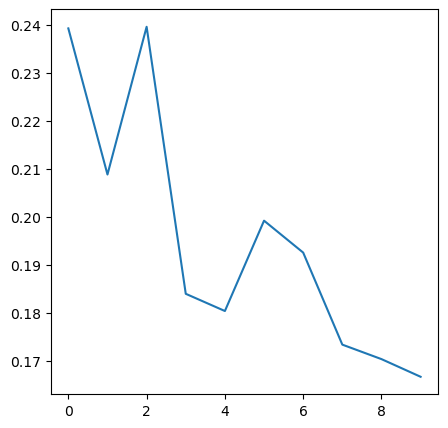

Relative error: 78.01%


In [8]:
print("Fitting the shallow model ...")
model = spectNN.spectralNNShallow(N,d,M,L,act_fn,init)
optimizer = torch.optim.Adam(model.params,lr=0.01)

start_time = time.time()
l_tr = []
for epoch in range(epochs):
    l = loss.loss_fn(x,model(u))
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    l_tr.append(l.item())
time_ellapsed = time.time() - start_time
print("Time taken: {} seconds" .format(time_ellapsed))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(l_tr)
plt.show()

with torch.no_grad():
    num = loss.loss_fn(x,model(u)).item()
    den = loss.loss_fn(x,0*x).item()
    #print([num, den])
    print("Relative error: {:.2f}%" .format(num/den*100))

Fitting the deep model ...
Time taken: 0.8940598964691162 seconds


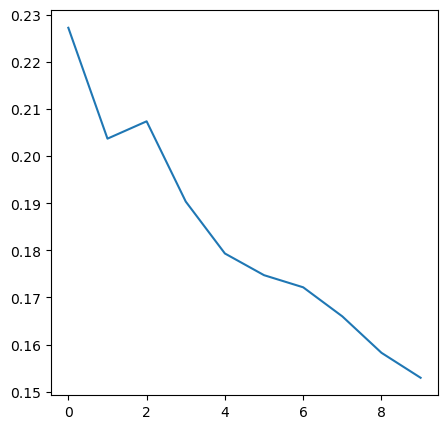

Relative error: 69.29%


In [9]:
print("Fitting the deep model ...")
model = spectNN.spectralNNDeep(N,d,M,L,depth,width,act_fn,init)
optimizer = torch.optim.Adam(model.params,lr=0.01)

start_time = time.time()
l_tr = []
for epoch in range(epochs):
    l = loss.loss_fn(x,model(u))
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    l_tr.append(l.item())
time_ellapsed = time.time() - start_time
print("Time taken: {} seconds" .format(time_ellapsed))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(l_tr)
plt.show()

with torch.no_grad():
    num = loss.loss_fn(x,model(u)).item()
    den = loss.loss_fn(x,0*x).item()
    #print([num, den])
    print("Relative error: {:.2f}%" .format(num/den*100))

Fitting the deepshared model ...
Time taken: 3.6504688262939453 seconds


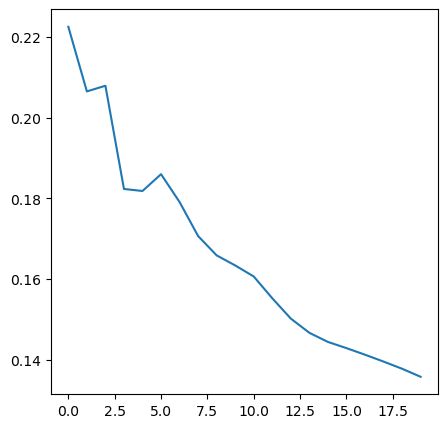

Relative error: 61.55%


In [10]:
print("Fitting the deepshared model ...")
model = spectNN.spectralNNShallow(N,d,M,L,act_fn,init)
#model = spectNN.spectralNNDeep(N,d,M,L,depth,width,act_fn,init)
#model = spectNN.spectralNNDeepshared(N,d,M,L,depth,width,act_fn,init)
optimizer = torch.optim.Adam(model.params,lr=0.01)

start_time = time.time()
l_tr = []
for i in range(20):
    l = loss.loss_fn(x,model(u))
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    l_tr.append(l.item())
time_ellapsed = time.time() - start_time
print("Time taken: {} seconds" .format(time_ellapsed))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(l_tr)
plt.show()

with torch.no_grad():
    num = loss.loss_fn(x,model(u)).item()
    den = loss.loss_fn(x,0*x).item()
    #print([num, den])
    print("Relative error: {:.2f}%" .format(num/den*100))